### You are asked to develop a solution that would predict what would be the right dosage for a new patient for clinical trial XYZ

### To help you, you are provide with two CSV files:

1) 10,000 rows of result data indicating if the dosage was effective, not effective, or had side effect with patient profile

2) a 500 row file that will be your validation data.  Please do not use this until you have a prediction model

### You plan to create a ML model...

Here is a VERY high level overview using dummy trial data

1) prepare data into train and test sets

2) define your model

3) train the mdoel using train data and check against the test data

4) verify the model against the validation data. Check the accuracy for each result

### We will use classical artificial neural network to desing our model:

The artificial neural network has an input layer, a hidden layer, and an output layer

![sample](ann.png)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### let's read in the CSV file containing the 10000 result 'data.csv' and check the content

The data have been already "normalized" for you

In [2]:
df = pd.read_csv('data.csv')
print('rows of data:', df.shape[0])
df.head(10)

rows of data: 10000


,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80),effective,no effect,side effect
0,0.6,0.0,1.0,0.0,0.2,0.40,0.60,0,1,0
1,0.4,0.0,0.0,1.0,0.4,0.25,0.21,0,1,0
2,0.6,0.0,0.0,1.0,0.7,0.25,0.60,0,1,0
3,0.2,1.0,0.0,0.0,0.4,0.90,0.21,0,1,0
4,0.3,1.0,0.0,0.0,0.9,0.90,0.70,0,1,0
5,0.9,1.0,0.0,0.0,0.4,0.60,0.70,0,0,1
6,0.1,1.0,0.0,0.0,0.7,0.50,0.50,0,1,0
7,0.6,1.0,0.0,0.0,0.2,0.80,0.60,0,1,0
8,0.9,1.0,0.0,0.0,0.2,0.60,0.70,0,0,1
9,0.0,1.0,0.0,0.0,0.9,0.90,0.21,0,1,0


### To train a model, we will need to split the data into training data and test data

Usually you leverage about 80% of classified data as train and 20% as test

In [3]:
train=df.sample(frac=0.8)
test=df.drop(train.index)

In [4]:
print('train data size:', train.shape[0])
train.head(10)

train data size: 8000


,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80),effective,no effect,side effect
9828,0.8,1.0,0.0,0.0,0.3,0.70,0.30,0,0,1
8219,0.8,0.0,1.0,0.0,0.3,0.25,0.50,0,1,0
8566,0.1,0.0,1.0,0.0,0.2,0.50,0.21,0,1,0
9760,0.6,0.0,1.0,0.0,0.9,0.30,1.00,1,0,0
4617,0.1,0.0,0.0,1.0,0.8,0.70,0.50,0,1,0
5971,0.7,1.0,0.0,0.0,0.4,0.60,0.60,0,1,0
4208,0.1,1.0,0.0,0.0,0.5,0.40,0.50,0,1,0
1717,0.5,1.0,0.0,0.0,0.7,0.25,0.70,0,1,0
4607,0.9,0.0,0.0,1.0,0.9,0.40,0.90,0,1,0
6980,0.5,1.0,0.0,0.0,0.7,0.50,0.90,0,1,0


In [5]:
print('test data size:', test.shape[0])
test.head(10)

test data size: 2000


,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80),effective,no effect,side effect
0,0.6,0.0,1.0,0.0,0.2,0.40,0.60,0,1,0
11,0.9,1.0,0.0,0.0,0.2,0.50,1.00,0,0,1
14,0.1,0.0,0.0,1.0,0.9,0.25,0.30,0,1,0
23,0.1,0.0,1.0,0.0,1.0,0.90,0.50,0,1,0
27,0.5,0.0,0.0,1.0,0.2,0.25,0.80,0,1,0
28,0.8,0.0,0.0,1.0,1.0,0.25,0.70,0,1,0
29,0.4,0.0,1.0,0.0,0.9,0.25,0.21,1,0,0
34,0.6,1.0,0.0,0.0,0.5,0.60,0.50,0,1,0
38,0.5,0.0,0.0,1.0,0.2,0.50,0.21,0,1,0
48,0.2,0.0,1.0,0.0,0.2,0.90,0.80,0,1,0


### The train data should be extracted out as x,y where y only contains the result

In [6]:
train_x = train.iloc[:,:7]
train_x.head(10)

,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80)
9828,0.8,1.0,0.0,0.0,0.3,0.70,0.30
8219,0.8,0.0,1.0,0.0,0.3,0.25,0.50
8566,0.1,0.0,1.0,0.0,0.2,0.50,0.21
9760,0.6,0.0,1.0,0.0,0.9,0.30,1.00
4617,0.1,0.0,0.0,1.0,0.8,0.70,0.50
5971,0.7,1.0,0.0,0.0,0.4,0.60,0.60
4208,0.1,1.0,0.0,0.0,0.5,0.40,0.50
1717,0.5,1.0,0.0,0.0,0.7,0.25,0.70
4607,0.9,0.0,0.0,1.0,0.9,0.40,0.90
6980,0.5,1.0,0.0,0.0,0.7,0.50,0.90


In [7]:
train_y = train.iloc[:,7:]
train_y.head(10)

,effective,no effect,side effect
9828,0,0,1
8219,0,1,0
8566,0,1,0
9760,1,0,0
4617,0,1,0
5971,0,1,0
4208,0,1,0
1717,0,1,0
4607,0,1,0
6980,0,1,0


### let's do the same for test data sets

In [8]:
test_x = test.iloc[:,:7]
test_y = test.iloc[:,7:]

###  lets use keras to train a model... first convert pandas dataframe to numpy array

In [9]:
x_train = train_x.values
y_train = train_y.values
x_test = test_x.values
y_test = test_y.values
y_test

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=int64)

### let's check for bias in the training data

count for: 0 918.0
count for: 1 5976.0
count for: 2 1106.0
0=effective, 1=no effect, 2=showing side effect


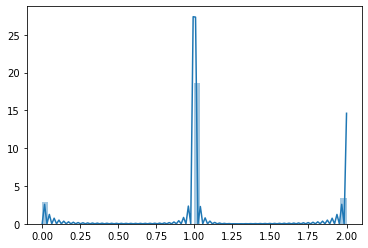

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

single_y = np.zeros(y_train.shape[0])
single_y_count = np.zeros((3,))

for i in range(y_train.shape[0]):
    y = np.argmax(y_train[i])
    single_y[i] = y
    single_y_count[y] += 1
    
sns.distplot(single_y)
for i in range(3):
    print('count for:',i,single_y_count[i])
    
print('0=effective, 1=no effect, 2=showing side effect')

### Because there are more data tied to 1.0 => which means no effect, the model will be trained to predict "no effect" more than "effective" or "side effect"

### let's train a model


In [11]:
from tensorflow import keras

In [12]:
x_train.shape
data_size = x_train.shape[1]

In [13]:
model = keras.models.Sequential()

# hidden layer
model.add( keras.layers.Dense(64, input_shape=(data_size,), activation='relu'))

#output layer
model.add( keras.layers.Dense(3, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [14]:
fit_history = model.fit(x_train, y_train,
  epochs=50 ,
  batch_size=200,
  validation_data=(x_test,y_test)
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 1s 78us/sample - loss: 0.9812 - accuracy: 0.5681 - val_loss: 0.8066 - val_accuracy: 0.7515
Epoch 2/50
8000/8000 [==============================] - 0s 7us/sample - loss: 0.7288 - accuracy: 0.7470 - val_loss: 0.6616 - val_accuracy: 0.7515
Epoch 3/50
8000/8000 [==============================] - 0s 7us/sample - loss: 0.6242 - accuracy: 0.7470 - val_loss: 0.5826 - val_accuracy: 0.7515
Epoch 4/50
8000/8000 [==============================] - 0s 7us/sample - loss: 0.5582 - accuracy: 0.7470 - val_loss: 0.5254 - val_accuracy: 0.7515
Epoch 5/50
8000/8000 [==============================] - 0s 7us/sample - loss: 0.5065 - accuracy: 0.7473 - val_loss: 0.4770 - val_accuracy: 0.7550
Epoch 6/50
8000/8000 [==============================] - 0s 7us/sample - loss: 0.4616 - accuracy: 0.7570 - val_loss: 0.4378 - val_accuracy: 0.7880
Epoch 7/50
8000/8000 [==============================] - 0s 7us/sample - los

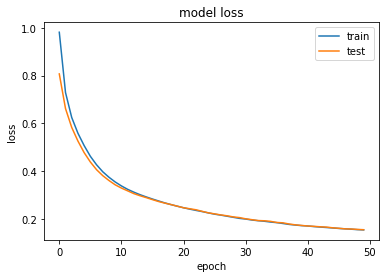

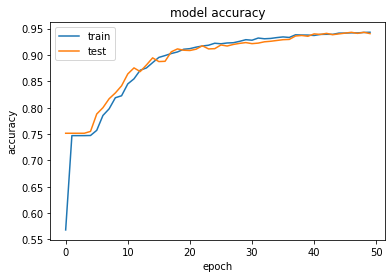

In [15]:


# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

### this simple model is predicting about 93% accuracy. Let's check against our validation set

In [16]:
val = pd.read_csv('validation.csv')
print('validation dataset:',val.shape[0])
val.head(10)

validation dataset: 500


,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80),effective,no effect,side effect
0,0.0,0.0,0.0,1.0,0.5,0.30,0.80,0,1,0
1,0.7,0.0,0.0,1.0,0.3,0.80,0.21,0,1,0
2,0.5,1.0,0.0,0.0,0.6,0.25,0.21,0,1,0
3,0.4,0.0,1.0,0.0,0.4,0.90,0.21,1,0,0
4,0.8,0.0,1.0,0.0,0.9,0.60,0.60,0,1,0
5,0.8,0.0,1.0,0.0,0.3,0.25,0.50,0,1,0
6,0.3,0.0,0.0,1.0,0.2,0.25,0.50,0,1,0
7,0.3,0.0,1.0,0.0,0.2,0.50,0.21,1,0,0
8,0.7,0.0,1.0,0.0,0.2,0.80,0.80,0,1,0
9,0.9,1.0,0.0,0.0,0.4,0.40,0.21,0,0,1


In [17]:
x_val = (val.iloc[:,:7]).values
y_val = (val.iloc[:,7:]).values
y_val

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=int64)

In [18]:
loss, acc = model.evaluate(x_val ,y_val)
print('acc:',acc , 'loss:',loss)

500/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

acc: 0.936 loss: 0.1551232738494873


In [19]:
predictions = model.predict(x_val)
my_matrix = np.zeros( (3,3), dtype='int')

# count of good guesses
count_matrix = np.zeros( (3,), dtype='int')
good_matrix = np.zeros( (3,), dtype='int')

# iterate through 10,000 test data
for i in range(val.shape[0]):
    expected = np.argmax(y_val[i])
    count_matrix[expected] +=1
    guess = np.argmax(predictions[i])
    if guess == expected:
        good_matrix[guess] +=1
    else:
        my_matrix[expected][guess] +=1
    
# show good matrix
print('Good guesses: 0=effective, 1=no effect, 2=side effect')
for i in range(3):
    percent = "( {:.2f}".format((good_matrix[i] * 100.0) / count_matrix[i]) + " %)"
    print('match count for:',i,'=', good_matrix[i] , '/',count_matrix[i] , percent)

Good guesses: 0=effective, 1=no effect, 2=side effect
match count for: 0 = 58 / 60 ( 96.67 %)
match count for: 1 = 357 / 368 ( 97.01 %)
match count for: 2 = 53 / 72 ( 73.61 %)


### As expected, the model is more accurate with the "no effect" prediction than the "effective" and "side effect"

### Lets see where the model failed:  what was expected vs how model predicted


Confusion Matrix: 0=effective, 1=no effect, 2=side effect


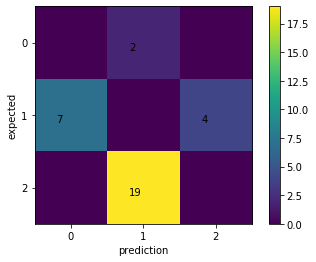

In [20]:
print('\nConfusion Matrix: 0=effective, 1=no effect, 2=side effect')

fig = plt.figure()
plt.xticks( range(3))
plt.yticks( range(3))

for y in range(3):
    for x in range(3):
        if my_matrix[y][x] != 0:
            # put text
            plt.text( x-len(str(x)) * 0.2, y+0.1, str(my_matrix[y][x]))
plt.xlabel('prediction')
plt.ylabel('expected')
plt.imshow(my_matrix)
plt.colorbar()
plt.show()
plt.close()

### How can we make the model better? by providing a better training data set

We will try to make the count of each result about the same

There were abut 1000 counts of effective and side effect results when we allocated 80% of data for training.. so we will resplit the data to reduce reprsentation of "1" train data


In [21]:
df = pd.read_csv('data.csv')
train=df.sample(frac=0.95)
test=df.drop(train.index)
train_x = train.iloc[:,:7]
train_y = train.iloc[:,7:]
x_train = train_x.values
y_train = train_y.values
x_test = test_x.values
y_test = test_y.values

single_y = np.zeros(y_train.shape[0])
single_y_count = np.zeros((3,))

for i in range(y_train.shape[0]):
    y = np.argmax(y_train[i])
    single_y[i] = y
    single_y_count[y] += 1
    

for i in range(3):
    print('count for:',i,single_y_count[i])
    

count for: 0 1077.0
count for: 1 7108.0
count for: 2 1315.0


count for: 0 1077.0
count for: 1 1615.0
count for: 2 1315.0


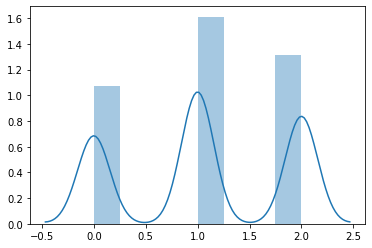

In [22]:
keep_row_count = single_y_count[0] * 1.5

    
remove_row_count = single_y_count[1] - keep_row_count
remove_index_list = []

count = 0

for i in range(y_train.shape[0]):
    if single_y[i] == 1:
        remove_index_list.append(i)
        count += 1
        if count >= remove_row_count:
            break
        
x_train = np.delete(x_train, remove_index_list , axis = 0)
y_train = np.delete(y_train, remove_index_list , axis = 0)

single_y = np.zeros(y_train.shape[0])
single_y_count = np.zeros((3,))

for i in range(y_train.shape[0]):
    y = np.argmax(y_train[i])
    single_y[i] = y
    single_y_count[y] += 1
    

for i in range(3):
    print('count for:',i,single_y_count[i])
    
sns.distplot(single_y)


In [23]:
model = keras.models.Sequential()

# hidden layer
model.add( keras.layers.Dense(64, input_shape=(data_size,), activation='relu'))
model.add( keras.layers.Dropout(0.5))
#output layer
model.add( keras.layers.Dense(3, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                512       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [24]:
fit_history = model.fit(x_train, y_train,
  epochs=300 ,
  batch_size=400,
  validation_data=(x_test,y_test)
)

Train on 4007 samples, validate on 2000 samples
Epoch 1/300
4007/4007 [==============================] - 0s 95us/sample - loss: 1.0834 - accuracy: 0.4280 - val_loss: 1.1529 - val_accuracy: 0.2450
Epoch 2/300
4007/4007 [==============================] - 0s 8us/sample - loss: 1.0061 - accuracy: 0.5221 - val_loss: 1.0334 - val_accuracy: 0.4410
Epoch 3/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.9441 - accuracy: 0.5995 - val_loss: 0.9454 - val_accuracy: 0.6410
Epoch 4/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.8996 - accuracy: 0.6277 - val_loss: 0.8841 - val_accuracy: 0.7140
Epoch 5/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.8473 - accuracy: 0.6656 - val_loss: 0.8344 - val_accuracy: 0.7440
Epoch 6/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.8123 - accuracy: 0.6751 - val_loss: 0.8073 - val_accuracy: 0.7295
Epoch 7/300
4007/4007 [==============================] - 0s 7us/sampl

Epoch 56/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.3671 - accuracy: 0.8550 - val_loss: 0.4006 - val_accuracy: 0.7825
Epoch 57/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.3677 - accuracy: 0.8602 - val_loss: 0.3900 - val_accuracy: 0.7900
Epoch 58/300
4007/4007 [==============================] - 0s 6us/sample - loss: 0.3583 - accuracy: 0.8717 - val_loss: 0.3852 - val_accuracy: 0.7895
Epoch 59/300
4007/4007 [==============================] - 0s 6us/sample - loss: 0.3588 - accuracy: 0.8650 - val_loss: 0.3839 - val_accuracy: 0.7895
Epoch 60/300
4007/4007 [==============================] - 0s 8us/sample - loss: 0.3575 - accuracy: 0.8627 - val_loss: 0.3834 - val_accuracy: 0.7875
Epoch 61/300
4007/4007 [==============================] - 0s 9us/sample - loss: 0.3552 - accuracy: 0.8647 - val_loss: 0.3831 - val_accuracy: 0.7855
Epoch 62/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.3437 - accuracy: 0.8730 - val_

Epoch 111/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.2637 - accuracy: 0.9077 - val_loss: 0.2925 - val_accuracy: 0.8450
Epoch 112/300
4007/4007 [==============================] - 0s 8us/sample - loss: 0.2683 - accuracy: 0.9029 - val_loss: 0.2977 - val_accuracy: 0.8365
Epoch 113/300
4007/4007 [==============================] - 0s 9us/sample - loss: 0.2630 - accuracy: 0.9027 - val_loss: 0.2822 - val_accuracy: 0.8560
Epoch 114/300
4007/4007 [==============================] - 0s 8us/sample - loss: 0.2605 - accuracy: 0.9074 - val_loss: 0.2857 - val_accuracy: 0.8550
Epoch 115/300
4007/4007 [==============================] - 0s 8us/sample - loss: 0.2585 - accuracy: 0.9109 - val_loss: 0.2817 - val_accuracy: 0.8555
Epoch 116/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.2512 - accuracy: 0.9104 - val_loss: 0.2786 - val_accuracy: 0.8605
Epoch 117/300
4007/4007 [==============================] - 0s 6us/sample - loss: 0.2563 - accuracy: 0.9142

Epoch 166/300
4007/4007 [==============================] - 0s 8us/sample - loss: 0.2173 - accuracy: 0.9251 - val_loss: 0.2320 - val_accuracy: 0.8935
Epoch 167/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.2147 - accuracy: 0.9236 - val_loss: 0.2266 - val_accuracy: 0.9010
Epoch 168/300
4007/4007 [==============================] - 0s 8us/sample - loss: 0.2178 - accuracy: 0.9261 - val_loss: 0.2229 - val_accuracy: 0.9080
Epoch 169/300
4007/4007 [==============================] - 0s 8us/sample - loss: 0.2171 - accuracy: 0.9171 - val_loss: 0.2315 - val_accuracy: 0.8920
Epoch 170/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.2126 - accuracy: 0.9221 - val_loss: 0.2312 - val_accuracy: 0.8945
Epoch 171/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.2111 - accuracy: 0.9256 - val_loss: 0.2267 - val_accuracy: 0.8960
Epoch 172/300
4007/4007 [==============================] - 0s 8us/sample - loss: 0.2121 - accuracy: 0.9281

4007/4007 [==============================] - 0s 7us/sample - loss: 0.1857 - accuracy: 0.9374 - val_loss: 0.2106 - val_accuracy: 0.9080
Epoch 221/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.1866 - accuracy: 0.9346 - val_loss: 0.2110 - val_accuracy: 0.9080
Epoch 222/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.1850 - accuracy: 0.9359 - val_loss: 0.2137 - val_accuracy: 0.9040
Epoch 223/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.1793 - accuracy: 0.9416 - val_loss: 0.2055 - val_accuracy: 0.9150
Epoch 224/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.1833 - accuracy: 0.9401 - val_loss: 0.2072 - val_accuracy: 0.9130
Epoch 225/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.1838 - accuracy: 0.9364 - val_loss: 0.2077 - val_accuracy: 0.9105
Epoch 226/300
4007/4007 [==============================] - ETA: 0s - loss: 0.2030 - accuracy: 0.93 - 0s 7us/sample - los

4007/4007 [==============================] - 0s 7us/sample - loss: 0.1664 - accuracy: 0.9451 - val_loss: 0.1858 - val_accuracy: 0.9255
Epoch 275/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.1686 - accuracy: 0.9426 - val_loss: 0.1822 - val_accuracy: 0.9260
Epoch 276/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.1674 - accuracy: 0.9438 - val_loss: 0.1908 - val_accuracy: 0.9225
Epoch 277/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.1654 - accuracy: 0.9443 - val_loss: 0.1849 - val_accuracy: 0.9265
Epoch 278/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.1645 - accuracy: 0.9448 - val_loss: 0.1848 - val_accuracy: 0.9270
Epoch 279/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.1675 - accuracy: 0.9406 - val_loss: 0.1872 - val_accuracy: 0.9260
Epoch 280/300
4007/4007 [==============================] - 0s 7us/sample - loss: 0.1614 - accuracy: 0.9438 - val_loss: 0

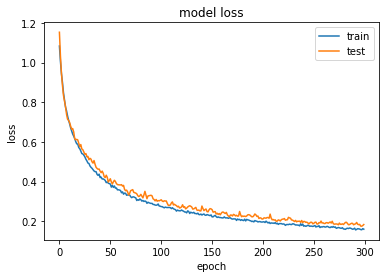

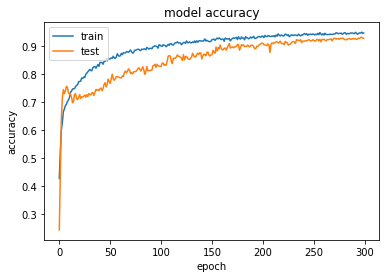

In [25]:
# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

In [26]:
loss, acc = model.evaluate(x_val ,y_val)
print('acc:',acc , 'loss:',loss)

500/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

acc: 0.932 loss: 0.16310197520256042


In [27]:
predictions = model.predict(x_val)
my_matrix = np.zeros( (3,3), dtype='int')

# count of good guesses
count_matrix = np.zeros( (3,), dtype='int')
good_matrix = np.zeros( (3,), dtype='int')

# iterate through 10,000 test data
for i in range(val.shape[0]):
    expected = np.argmax(y_val[i])
    count_matrix[expected] +=1
    guess = np.argmax(predictions[i])
    if guess == expected:
        good_matrix[guess] +=1
    else:
        my_matrix[expected][guess] +=1
    
# show good matrix
print('Good guesses: 0=effective, 1=no effect, 2=side effect')
for i in range(3):
    percent = "( {:.2f}".format((good_matrix[i] * 100.0) / count_matrix[i]) + " %)"
    print('match count for:',i,'=', good_matrix[i] , '/',count_matrix[i] , percent)

Good guesses: 0=effective, 1=no effect, 2=side effect
match count for: 0 = 60 / 60 ( 100.00 %)
match count for: 1 = 337 / 368 ( 91.58 %)
match count for: 2 = 69 / 72 ( 95.83 %)


### the prediction result is a bit better


Confusion Matrix: 0=effective, 1=no effect, 2=side effect


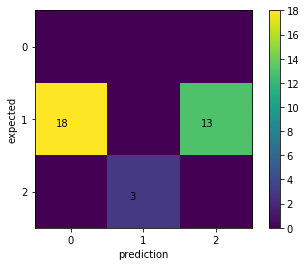

In [28]:
print('\nConfusion Matrix: 0=effective, 1=no effect, 2=side effect')

fig = plt.figure()
plt.xticks( range(3))
plt.yticks( range(3))

for y in range(3):
    for x in range(3):
        if my_matrix[y][x] != 0:
            # put text
            plt.text( x-len(str(x)) * 0.2, y+0.1, str(my_matrix[y][x]))
plt.xlabel('prediction')
plt.ylabel('expected')
plt.imshow(my_matrix)
plt.colorbar()
plt.show()
plt.close()

0=effective, 1=no effect care 2=BAD
dosage prediction for patient profile: race=1, weight: 120lb , bp: 270/90 , age: 17


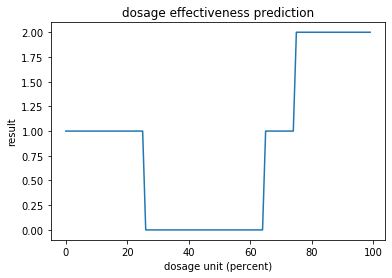

In [29]:
profile = [ 0 , 0, 1.0 , 0 , 0.4 , 0.90 ,0.21 ]

max_row = 100
x = np.zeros([max_row,7])
for i in range(max_row):
    for j in range(7):
        x[i][j] = profile[j]
        x[i][0] = i / max_row

y = model.predict(x)
g = np.zeros(max_row)
for i in range(max_row):
    guess = np.argmax(y[i])
    g[i] = guess
    
    
print('0=effective, 1=no effect care 2=BAD')
print('dosage prediction for patient profile: race=1, weight: 120lb , bp: 270/90 , age: 17')

plt.plot(g)

plt.title('dosage effectiveness prediction')
plt.ylabel('result')
plt.xlabel('dosage unit (percent)')
plt.show()

    
    

In [30]:
model.save('model.h5')